<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">66 Days of Data<br>[05/07/2021] Day 3</h1>
<br>

This is slightly modified from the original module in Datacamp, as I find it better to put the concept of covariance later on.

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:black; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

    
* [Dependencies](#1)
* [Configurations](#2)
* [Seeding](#3)
* [Loading Iris Data](#4)
* [Stastical Inferences](#5)
    * [Descripte Analytics](#51)
        * [Mean](#511)
        * [Median](#512)
        * [Mode](#513)
        * [Range](#514)
        * [Population Variance](#515)
        * [Population Standard Deviation](#516)
        * [Percentiles](#517)
    * [Box and Whiskers Plot](#52)

<a id="1"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Dependencies</h1>

In [1]:
# !pip install -U -q scikit-learn==0.24.2

import os
import random
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import torch
import scipy

from sklearn.datasets import *

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

<a id="2"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Configurations</h1>

In [2]:
np.random.seed(42)

%matplotlib inline
sns.set(style="ticks")
plt.style.use("dark_background")

# mpl.rc('axes', labelsize=15)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Quantitative Exploratory Data Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<a id="3"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Seeding</h1>

In [3]:
def seed_all(seed: int = 1930):
    """Seed all random number generators."""
    print("Using Seed Number {}".format(seed))

    os.environ["PYTHONHASHSEED"] = str(
        seed
    )  # set PYTHONHASHSEED env var at fixed value
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)  # pytorch (both CPU and CUDA)
    np.random.seed(seed)  # for numpy pseudo-random generator
    random.seed(seed)  # set fixed value for python built-in pseudo-random generator
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = False


def seed_worker(_worker_id):
    """Seed a worker with the given ID."""
    worker_seed = torch.initial_seed() % 2 ** 32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
    
seed_all(1992)

Using Seed Number 1992


<a id="4"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Loading Iris Data</h1>

```{=mediawiki}
{{short description|Any experiment with two possible random outcomes}}
```
```{=mediawiki}
{{Probability fundamentals}}
```
![Graphs of probability *P* of **not** observing independent events each
of probability *p* after *n* Bernoulli trials vs *np* for various *p*.
Three examples are shown:\
**Blue curve**: Throwing a 6-sided die 6 times gives 33.5% chance that 6
(or any other given number) never turns up; it can be observed that as
*n* increases, the probability of a 1/*n*-chance event never appearing
after *n* tries rapidly converges to *0*.\
**Grey curve**: To get 50-50 chance of throwing a
[Yahtzee](Yahtzee "wikilink") (5 cubic dice all showing the same number)
requires 0.69 × 1296 \~ 898 throws.\
**Green curve**: Drawing a card from a deck of playing cards without
jokers 100 (1.92 × 52) times with replacement gives 85.7% chance of
drawing the ace of spades at least
once.](Bernoulli_trial_progression.svg "fig:Graphs of probability P of not observing independent events each of probability p after n Bernoulli trials vs np for various p. Three examples are shown: Blue curve: Throwing a 6-sided die 6 times gives 33.5% chance that 6 (or any other given number) never turns up; it can be observed that as n increases, the probability of a 1/n-chance event never appearing after n tries rapidly converges to 0. Grey curve: To get 50-50 chance of throwing a Yahtzee (5 cubic dice all showing the same number) requires 0.69 × 1296 ~ 898 throws. Green curve: Drawing a card from a deck of playing cards without jokers 100 (1.92 × 52) times with replacement gives 85.7% chance of drawing the ace of spades at least once."){width="400"}
In the theory of [probability](probability "wikilink") and
[statistics](statistics "wikilink"), a **Bernoulli trial** (or
**binomial trial**) is a random
[experiment](Experiment_(probability_theory) "wikilink") with exactly
two possible [outcomes](Outcome_(probability) "wikilink"), \"success\"
and \"failure\", in which the probability of success is the same every
time the experiment is conducted.[^1] It is named after [Jacob
Bernoulli](Jacob_Bernoulli "wikilink"), a 17th-century Swiss
mathematician, who analyzed them in his *[Ars
Conjectandi](Ars_Conjectandi "wikilink")* (1713).[^2]

The mathematical formalisation of the Bernoulli trial is known as the
[Bernoulli process](Bernoulli_process "wikilink"). This article offers
an elementary introduction to the concept, whereas the article on the
Bernoulli process offers a more advanced treatment.

Since a Bernoulli trial has only two possible outcomes, it can be framed
as some \"yes or no\" question. For example:

-   Is the top card of a shuffled deck an ace?
-   Was the newborn child a girl? (See [human sex
    ratio](human_sex_ratio "wikilink").)

Therefore, success and failure are merely labels for the two outcomes,
and should not be construed literally. The term \"success\" in this
sense consists in the result meeting specified conditions, not in any
moral judgement. More generally, given any [probability
space](probability_space "wikilink"), for any
[event](Event_(probability_theory) "wikilink") (set of outcomes), one
can define a Bernoulli trial, corresponding to whether the event
occurred or not (event or [complementary
event](complementary_event "wikilink")). Examples of Bernoulli trials
include:

-   Flipping a coin. In this context, obverse (\"heads\") conventionally
    denotes success and reverse (\"tails\") denotes failure. A [fair
    coin](fair_coin "wikilink") has the probability of success 0.5 by
    definition. In this case there are exactly two possible outcomes.
-   Rolling a `{{dice}}`{=mediawiki}, where a six is \"success\" and
    everything else a \"failure\". In this case there are six possible
    outcomes, and the event is a six; the complementary event \"not a
    six\" corresponds to the other five possible outcomes.
-   In conducting a political [opinion poll](opinion_poll "wikilink"),
    choosing a voter at random to ascertain whether that voter will vote
    \"yes\" in an upcoming referendum.

## Definition

Independent repeated trials of an experiment with exactly two possible
outcomes are called Bernoulli trials. Call one of the outcomes
\"success\" and the other outcome \"failure\". Let $p$ be the
probability of success in a Bernoulli trial, and $q$ be the probability
of failure. Then the probability of success and the probability of
failure sum to one, since these are complementary events: \"success\"
and \"failure\" are [mutually exclusive](mutually_exclusive "wikilink")
and [exhaustive](Collectively_exhaustive_events "wikilink"). Thus one
has the following relations:

$$p = 1 - q, \quad \quad q = 1 - p, \quad \quad p + q = 1.$$

Alternatively, these can be stated in terms of
[odds](Odds_(statistics) "wikilink"): given probability *p* of success
and *q* of failure, the *odds for* are $p:q$ and the *odds against* are
$q:p.$ These can also be expressed as numbers, by dividing, yielding the
odds for, $o_f$, and the odds against, $o_a:$,

$$\begin{align}
o_f &= p/q = p/(1-p) = (1-q)/q\\
o_a &= q/p = (1-p)/p = q/(1-q)
\end{align}$$ These are [multiplicative
inverses](multiplicative_inverse "wikilink"), so they multiply to 1,
with the following relations:

$$o_f = 1/o_a, \quad o_a = 1/o_f, \quad o_f \cdot o_a = 1.$$

In the case that a Bernoulli trial is representing an event from
finitely many [equally likely
outcomes](equally_likely_outcomes "wikilink"), where *S* of the outcomes
are success and *F* of the outcomes are failure, the odds for are $S:F$
and the odds against are $F:S.$ This yields the following formulas for
probability and odds:

$$\begin{align}
p &= S/(S+F)\\
q &= F/(S+F)\\
o_f &= S/F\\
o_a &= F/S
\end{align}$$ Note that here the odds are computed by dividing the
number of outcomes, not the probabilities, but the proportion is the
same, since these ratios only differ by multiplying both terms by the
same constant factor.

[Random variables](Random_variable "wikilink") describing Bernoulli
trials are often encoded using the convention that 1 = \"success\", 0 =
\"failure\".

Closely related to a Bernoulli trial is a binomial experiment, which
consists of a fixed number $n$ of [statistically
independent](statistically_independent "wikilink") Bernoulli trials,
each with a probability of success $p$, and counts the number of
successes. A random variable corresponding to a binomial is denoted by
$B(n,p)$, and is said to have a *[binomial
distribution](binomial_distribution "wikilink")*. The probability of
exactly $k$ successes in the experiment $B(n,p)$ is given by:

$$P(k)={n \choose k} p^k q^{n-k}$$

where ${n \choose k}$ is a [binomial
coefficient](binomial_coefficient "wikilink").

Bernoulli trials may also lead to [negative binomial
distributions](negative_binomial_distribution "wikilink") (which count
the number of successes in a series of repeated Bernoulli trials until a
specified number of failures are seen), as well as various other
distributions.

When multiple Bernoulli trials are performed, each with its own
probability of success, these are sometimes referred to as [Poisson
trials](Poisson_trial "wikilink").[^3]

## Example: tossing coins {#example_tossing_coins}

Consider the simple experiment where a fair coin is tossed four times.
Find the probability that exactly two of the tosses result in heads.

### Solution

For this experiment, let a heads be defined as a *success* and a tails
as a *failure.* Because the coin is assumed to be fair, the probability
of success is $p = \tfrac{1}{2}$. Thus the probability of failure, $q$,
is given by

$$q = 1 - p = 1 - \tfrac{1}{2} = \tfrac{1}{2}$$.

Using the equation above, the probability of exactly two tosses out of
four total tosses resulting in a heads is given by:

$$\begin{align}
P(2)
  &= {4 \choose 2} p^{2} q^{4-2} \\
  &= 6 \times \left(\tfrac{1}{2}\right)^2 \times \left(\tfrac{1}{2}\right)^2 \\
  &= \dfrac {3}{8}.
\end{align}$$

## See also {#see_also}

-   [Bernoulli scheme](Bernoulli_scheme "wikilink")
-   [Bernoulli sampling](Bernoulli_sampling "wikilink")
-   [Bernoulli distribution](Bernoulli_distribution "wikilink")
-   [Binomial distribution](Binomial_distribution "wikilink")
-   [Binomial coefficient](Binomial_coefficient "wikilink")
-   [Binomial proportion confidence
    interval](Binomial_proportion_confidence_interval "wikilink")
-   [Poisson sampling](Poisson_sampling "wikilink")
-   [Sampling design](Sampling_design "wikilink")
-   [Coin flipping](Coin_flipping "wikilink")
-   [Jacob Bernoulli](Jacob_Bernoulli "wikilink")
-   [Fisher\'s exact test](Fisher's_exact_test "wikilink")
-   [Boschloo\'s test](Boschloo's_test "wikilink")

## References

```{=mediawiki}
{{reflist}}
```
## External links {#external_links}

```{=mediawiki}
{{Commonscat}}
```
-   ```{=mediawiki}
    {{springer|title=Bernoulli trials|id=p/b015690}}
    ```

-   ```{=mediawiki}
    {{cite web|url=http://www.math.uah.edu/stat/applets/BinomialTimelineExperiment.html|title=Simulation of n Bernoulli trials|publisher=math.uah.edu|access-date=2014-01-21}}
    ```

```{=mediawiki}
{{DEFAULTSORT:Bernoulli Trial}}
```
[Category:Discrete
distributions](Category:Discrete_distributions "wikilink")
[Category:Coin flipping](Category:Coin_flipping "wikilink")
[Category:Experiment (probability
theory)](Category:Experiment_(probability_theory) "wikilink")

[^1]: `{{cite encyclopedia | last = Papoulis | first =  A. | contribution = Bernoulli Trials | title = Probability, Random Variables, and Stochastic Processes | edition =  2nd | location = New York | publisher = [[McGraw-Hill]] | pages = 57–63 | year = 1984}}`{=mediawiki}

[^2]: James Victor Uspensky: *Introduction to Mathematical Probability*,
    McGraw-Hill, New York 1937, page 45

[^3]: [Rajeev Motwani](Rajeev_Motwani "wikilink") and P. Raghavan.
    Randomized Algorithms. Cambridge University Press, New York (NY),
    1995, p.67-68


In [4]:
def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes. That is to say:
    If I toss coin 10 times, and landed head 7 times, then success rate is
    70% -> this is what I should return. But note this is binary.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random(size=1)


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success


def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes. That is to say:
    If I toss coin 10 times, and landed head 7 times, then success rate is
    70% -> this is what I should return. But note this is binary.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials,# Choose random number between zero and one: random_number # If less than p, it's a success so add one to n_success
    random_number_arr = [True if np.random.random(size=n) < p else False]
    n_success = np.sum(random_number_arr, axis = None)
    return n_success

In [5]:
# import iris and load as dataframe
iris = load_iris(return_X_y=False, as_frame=True)

# make a copy of iris
df_iris = iris.frame.copy()

# change target to species and map 0,1,2 to species
df_iris.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                   'petal width (cm)', 'species']  
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_iris['species'] = df_iris['species'].map(species_mapping)

<a id="5"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">[2] Quantitative Exploratory Data Analysis</h1>

<a id="51"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Descriptive Statistics</h2>

<a id="511"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Mean</h3>

```numpy.mean(a, axis=None, dtype=None)```

* a: array containing numbers whose mean is required
* axis: axis or axes along which the means are computed, 
    * default is to compute the mean of the flattened array
* dtype: type of data to be used in calculations

In [6]:
# get versicolor's petal length
versicolor_petal_length = df_iris.loc[df_iris['species'] ==
                                      'versicolor']['petal length (cm)'].to_numpy(dtype=np.float64, copy=False)

# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length, axis=None, dtype=np.float16)
# Print the result with some nice formatting
print('Iris. versicolor:', mean_length_vers, 'cm')

Iris. versicolor: 4.26 cm


<a id="512"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Median</h3>

```numpy.median(a, axis=None, out=None)```

* a: array containing numbers whose median is required
* axis: axis or axes along which the median is computed
    * default is to compute the median of the flattened array
* out: alternative output array to place the result, must have the same shape and buffer length as the expected output.

In [7]:
# Compute the median: median_length_vers
median_length_vers = np.median(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', median_length_vers, 'cm')

Iris. versicolor: 4.35 cm


<a id="513"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Mode</h3>

**The mode is the most frequently occurring number.**

```python
scipy.stats.mstats.mode(a, axis=0)
```

* a: array containing numbers whose mode is required
* axis: axis or axes along which the mode is computed
    * default is 0
    * if None, compute the mode of the flattened array

It returns (```mode: array of modal values, count: array of counts for each mode```).

In [8]:
# Compute the mode: mode_length_vers
mode_length_vers = scipy.stats.mstats.mode(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', mode_length_vers, 'cm')

Iris. versicolor: ModeResult(mode=array([4.5]), count=array([7.])) cm


<a id="514"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Range</h3>

```numpy.ptp(a, axis=None, out=None)```

'ptp' stands for 'peak to peak'.
* a: array containing numbers whose range is required
* axis: axis or axes along which the range is computed, 
   * default is to compute the range of the flattened array. 

It returns a new array with the result.

In [9]:
# Compute the range: range_length_vers
range_length_vers = np.ptp(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', range_length_vers, 'cm')

Iris. versicolor: 2.0999999999999996 cm


<a id="515"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Population Variance</h3>

Variance can be calculated in python using different libraries like numpy, pandas, and statistics.

```
numpy.var(a, axis=None, dtype=None, ddof=0)
```

* a: array containing numbers whose variance is required
* axis: axis or axes along which the variances are computed, default is to compute the mean of the flattened array
* ddof : int, optional
    * ddof stands for delta degrees of freedom. It is the divisor used in the calculation, which is N - ddof, where N is the number of elements. 
    * The default value of ddof is 0.

**Formula**

$$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}$$

In [10]:
# Array of differences to mean: differences
differences = versicolor_petal_length - \
    np.mean(versicolor_petal_length, axis=None)

# Square the differences: diff_sq
diff_sq = np.square(differences)

# Compute the mean square difference: variance_explicit
variance_explicit = np.sum(np.square(versicolor_petal_length-np.mean(
    versicolor_petal_length, axis=None)))/len(versicolor_petal_length)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length, axis=None)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


Note that the unit of variance is not the same as the dataset, for example, if we are looking at the Iris dataset's versicolor petal length, which is in cm, and its variance is 0.2164 cm squared. So it is not easy to interpret the variance and hence we can look at the standard deviation, which square roots the variance, to make it the same unit as the dataset. With standard deviation, we have 0.465188 cm.

<a id="516"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Population Standard Deviation</h3>

The standard deviation is the square root of variance.

```
numpy.std(a, axis=None, dtype=None, ddof=0)
```
Parameters are the same as ```numpy.var()```.

* a: array containing numbers whose standard deviation is required
* axis: axis or axes along which the standard deviations are computed, default is to compute the mean of the flattened array
* ddof : int, optional
    * ddof stands for delta degrees of freedom. It is the divisor used in the calculation, which is N - ddof, where N is the number of elements. 
    * The default value of ddof is 0.

**Formula**

$$\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}}$$

Because the variance is the average of the distances from the mean _squared_, the standard deviation tells us approximately, on average, the distance of numbers in a distribution from the mean of the distribution.

In the **Mean** section, we see that the average petal length is of 4.26 cm, our standard deviation tells us that ***on average***, each data point in the distribution (population) is around 0.465188~ cm away from the mean.

In [11]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length, axis=None)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length, axis=None))

0.4651881339845203
0.4651881339845203


<a id="517"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Percentile</h3>

In [12]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(a=versicolor_petal_length,
                            q = percentiles,
                            axis = None)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
   
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y

    y =  np.arange(start=1, stop=n+1)/n
    
    return x, y

Saving figure [Versicolor] Percentile + ECDF Plot on Petal Length


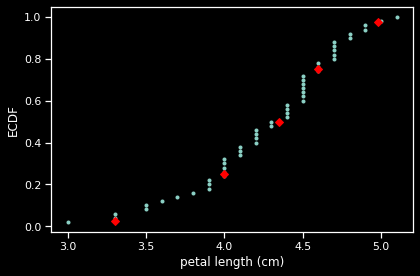

In [14]:
# Plot the ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
_ = plt.plot(x_vers, y_vers, ".")
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker = 'D', color='red', linestyle='none')

# Save the plot
save_fig("[Versicolor] Percentile + ECDF Plot on Petal Length")

# Show the plot
plt.show()


<a id="518"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Skewness</h3>

```
scipy.stats.skew(a, axis=0)
```

For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution.


Skewness refers to the lack of symmetry in a distribution of data.

[Technical note: we will be talking about skewness here only in the context of _unimodal_ distributions.]

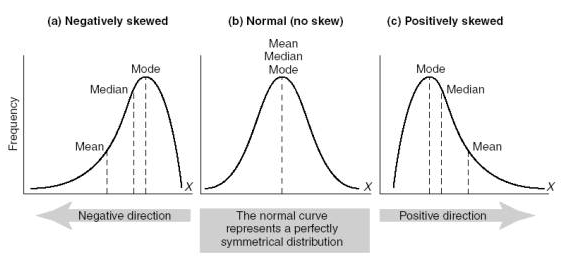

A *positive-skewed* distribution is one whose right tail is longer or fatter than its left. 

Conversely, a *negative-skewed* distribution is one whose left tail is longer or fatter than its right.


Symmetric distributions have no skewness!

#### Skewness and measures of central tendency

The mean, median, and mode are affected by skewness.

When a distribution is symmetric, the mean, median, and mode are the same.

> Symmetric: mean == median == mode

When a distribution is negatively skewed, the mean is less than the median, which is less than the mode.

> Negative skew: mean < median < mode

When a distribution is positively skewed, the mean is greater than the median, which is greater than the mode.

> Positive skew: mode < median < mean


You’ve learned numerical measures of center, spread, and outliers, but what about **measures of shape**? The histogram can give you a general idea of the shape, but two numerical measures of shape give a more precise evaluation: **skewness tells you the amount and direction of skew** (departure from horizontal symmetry), and **kurtosis tells you how tall and sharp the central peak is**, relative to a standard bell curve.

Why do we care? One application is **testing for normality**: many statistics inferences require that a distribution be normal or nearly normal. A normal distribution has skewness and excess kurtosis of 0, so if your distribution is close to those values then it is probably close to normal.

In [15]:
# Compute the range: range_length_vers
skew_length_vers = scipy.stats.skew(versicolor_petal_length, axis=None)
# Print the result with some nice formatting
print('Iris. versicolor:', skew_length_vers, 'cm')

Iris. versicolor: -0.5881586743962586 cm


Indeed, our skew is negative, indicating the data is in a slightly negative skewed distribution, where the left tail is longer. A natural question that follows is how to calculate skewness? How is the value -0.588158~ quantified?

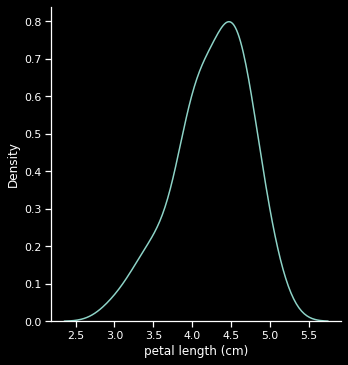

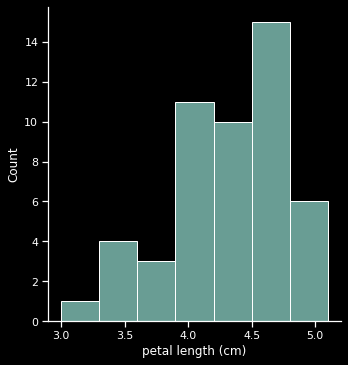

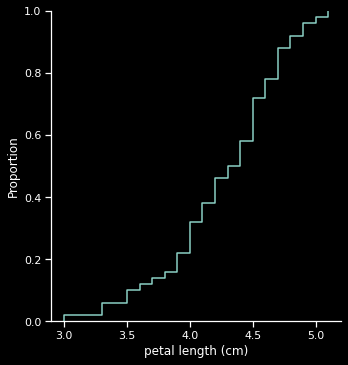

In [16]:
_ = sns.displot(x = versicolor_petal_length, kind = 'kde')
_ = plt.xlabel(xlabel='petal length (cm)')
_ = sns.displot(x = versicolor_petal_length, kind = 'hist')
_ = plt.xlabel(xlabel='petal length (cm)')
_ = sns.displot(x = versicolor_petal_length, kind = 'ecdf')
_ = plt.xlabel(xlabel='petal length (cm)')

<a id="52"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Box and Whiskers Plot</h2>

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine.

Furthermore, A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In a box plot, we draw a box from the first quartile to the third quartile. A vertical/horizontal line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

Saving figure [Versicolor] Box and Whiskers Plot on Petal Length


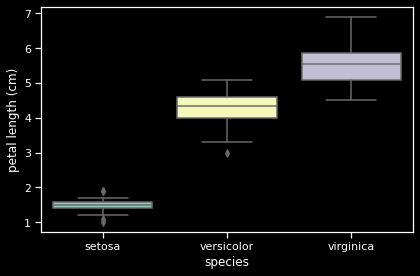

In [17]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y = 'petal length (cm)', data=df_iris)

# Label the axes
_ = plt.xlabel(xlabel='species')
_ = plt.ylabel(ylabel = 'petal length (cm)')

# Save the plot
save_fig("[Versicolor] Box and Whiskers Plot on Petal Length")

# Show the plot
plt.show()


To understand the graph above, let us just look at **versicolor** for consistency. In simple terms, the ECDF of this species can be interpreted as follows: what percentage of **versicolor** have a **petal length** of less than 4 cm? By eyeballing, we can tell that about $20\%$ just by pinpointing which value on the y-axis (ECDF) corresponds to 4 cm on the x-axis (petal length).